In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.width', None)

In [3]:
def load():
    data = pd.read_csv("datasets\diabetes.csv")
    return data

In [4]:
df = load()

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60000,0.62700,50,1
1,1,85,66,29,0,26.60000,0.35100,31,0
2,8,183,64,0,0,23.30000,0.67200,32,1
3,1,89,66,23,94,28.10000,0.16700,21,0
4,0,137,40,35,168,43.10000,2.28800,33,1


### Veri Setini Tanıyalım

* Pregnancies ( Hamilelik Sayısı )
* Glucose ( 2 saatlik Plazma Glikoz Konsantrasyonu )
* Blood Pressure ( Kan Basıncı Küçük Tansiyon )
* SkinThickness ( Cilt Kalınlığı )
* Insulin ( 2 saatlik Serum İnsülini )
* DiabetesPedigreeFunction ( Diyabet Soyağacı Fonksiyonu )
* BMI ( Vücut Kitle Endeksi )
* Age ( Yaş )
* Outcome ( Hastalığa sahip (1) ya da değil (0) )

##### Bağımlı değişken : Outcome
#### Ana hedef : Değerleri verilen kişinin şeker hastası olup olmadığını tahmin eden model geliştirmek.



# Keşifçi Veri Analizi (Exploratory Data Analysis) 


 1. Genel Resim
 2. Kategorik Değişken Analizi 
 3. Sayısal Değişken Analizi
 4. Hedef Değişken Analizi  
 (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre nümerik değişkenlerin ortalaması)
 5. Aykırı Gözlem Analizi
 6. Eksik Gözlem Analiz
 7. Korelasyon Analizi 


### 1. Genel Resim


In [6]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Describe #####################")
    print(dataframe.describe([0.05, 0.50, 0.95, 0.99]).T)

In [7]:
check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  \
0            6      148             72             35        0 33.60000   
1            1       85             66             29        0 26.60000   
2            8      183             64              0        0 23.30000   

   DiabetesPedigreeFunction  Age  Outcome  
0                   0.62700   50        1  
1                   0.35100   31        0  
2                   0.67200   32        1  
##################### Tail 

In [8]:
# NUMERİK VE KATEGORİK DEĞİŞKENLERİN YAKALANMASI

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols, num_but_cat

In [10]:
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [11]:
cat_cols

['Outcome']


### 2. Kategorik Değişken Analizi 


In [12]:
#kategorik
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [13]:
for col in cat_cols:
    cat_summary(df, col)

   Outcome    Ratio
0      500 65.10417
1      268 34.89583



### 3. Sayısal Değişken Analizi 


In [14]:
#nümerik
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")

count   768.00000
mean      3.84505
std       3.36958
min       0.00000
5%        0.00000
10%       0.00000
20%       1.00000
30%       1.00000
40%       2.00000
50%       3.00000
60%       4.00000
70%       5.00000
80%       7.00000
90%       9.00000
95%      10.00000
99%      13.00000
max      17.00000
Name: Pregnancies, dtype: float64


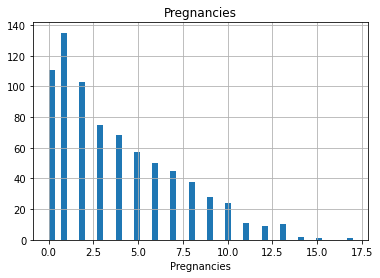

#####################################
count   768.00000
mean    120.89453
std      31.97262
min       0.00000
5%       79.00000
10%      85.00000
20%      95.00000
30%     102.00000
40%     109.00000
50%     117.00000
60%     125.00000
70%     134.00000
80%     147.00000
90%     167.00000
95%     181.00000
99%     196.00000
max     199.00000
Name: Glucose, dtype: float64


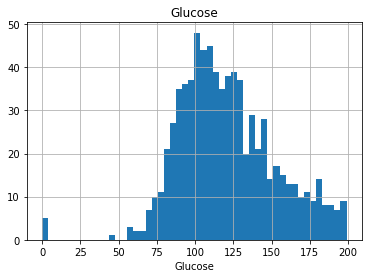

#####################################
count   768.00000
mean     69.10547
std      19.35581
min       0.00000
5%       38.70000
10%      54.00000
20%      60.00000
30%      64.00000
40%      68.00000
50%      72.00000
60%      74.00000
70%      78.00000
80%      82.00000
90%      88.00000
95%      90.00000
99%     106.00000
max     122.00000
Name: BloodPressure, dtype: float64


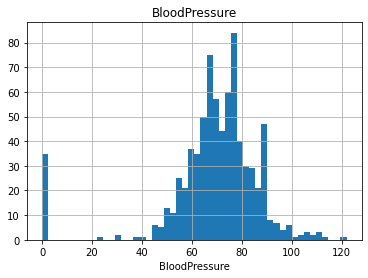

#####################################
count   768.00000
mean     20.53646
std      15.95222
min       0.00000
5%        0.00000
10%       0.00000
20%       0.00000
30%       8.20000
40%      18.00000
50%      23.00000
60%      27.00000
70%      31.00000
80%      35.00000
90%      40.00000
95%      44.00000
99%      51.33000
max      99.00000
Name: SkinThickness, dtype: float64


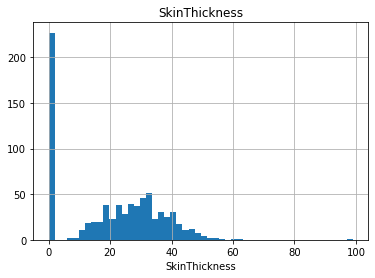

#####################################
count   768.00000
mean     79.79948
std     115.24400
min       0.00000
5%        0.00000
10%       0.00000
20%       0.00000
30%       0.00000
40%       0.00000
50%      30.50000
60%      72.20000
70%     106.00000
80%     150.00000
90%     210.00000
95%     293.00000
99%     519.90000
max     846.00000
Name: Insulin, dtype: float64


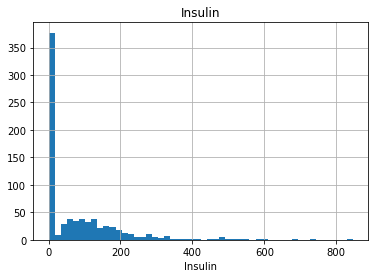

#####################################
count   768.00000
mean     31.99258
std       7.88416
min       0.00000
5%       21.80000
10%      23.60000
20%      25.90000
30%      28.20000
40%      30.10000
50%      32.00000
60%      33.70000
70%      35.49000
80%      37.80000
90%      41.50000
95%      44.39500
99%      50.75900
max      67.10000
Name: BMI, dtype: float64


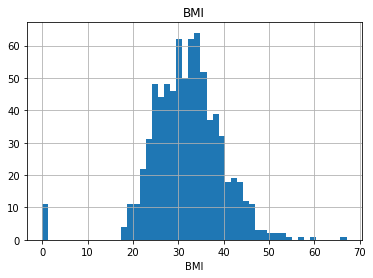

#####################################
count   768.00000
mean      0.47188
std       0.33133
min       0.07800
5%        0.14035
10%       0.16500
20%       0.21940
30%       0.25900
40%       0.30280
50%       0.37250
60%       0.45420
70%       0.56370
80%       0.68700
90%       0.87860
95%       1.13285
99%       1.69833
max       2.42000
Name: DiabetesPedigreeFunction, dtype: float64


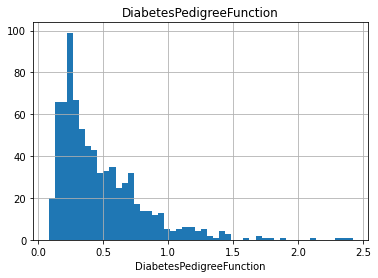

#####################################
count   768.00000
mean     33.24089
std      11.76023
min      21.00000
5%       21.00000
10%      22.00000
20%      23.00000
30%      25.00000
40%      27.00000
50%      29.00000
60%      33.00000
70%      38.00000
80%      42.60000
90%      51.00000
95%      58.00000
99%      67.00000
max      81.00000
Name: Age, dtype: float64


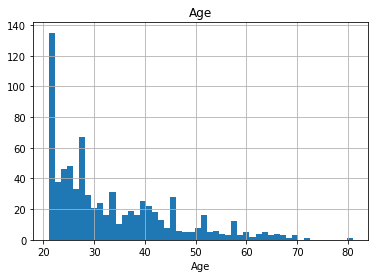

#####################################


In [15]:
for col in num_cols:
    num_summary(df, col, plot=True)


### 4. Hedef Değişken Analizi 


In [16]:
# hedef değişkene göre numerik değişkenlerin ortalaması

In [17]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [18]:
for col in num_cols:
    target_summary_with_num(df,"Outcome",col)

         Pregnancies
Outcome             
0            3.29800
1            4.86567


          Glucose
Outcome          
0       109.98000
1       141.25746


         BloodPressure
Outcome               
0             68.18400
1             70.82463


         SkinThickness
Outcome               
0             19.66400
1             22.16418


          Insulin
Outcome          
0        68.79200
1       100.33582


             BMI
Outcome         
0       30.30420
1       35.14254


         DiabetesPedigreeFunction
Outcome                          
0                         0.42973
1                         0.55050


             Age
Outcome         
0       31.19000
1       37.06716





### 5. Aykırı Gözlem Analizi


In [19]:
#eşik değer hesapla
def outlier_thresholds(dataframe, col_name, q1=0.5, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [20]:
# outlier'ları kontrol et
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [21]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age False


In [22]:
# Aykırı değerlerin kendilerine erişip gözlemle
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

for col in num_cols:
    print(col, grab_outliers(df,col))

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Pregnancies None
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  \
75             1        0             48             20        0 24.70000   
182            1        0             74             20       23 27.70000   
342            1        0             68             35        0 32.00000   
349            5        0             80             32        0 41.00000   
502            6        0             68             41        0 39.00000   

     DiabetesPedigreeFunction  Age  Outcome  
75                    0.14000   22        0  
182                   0.29900   21        0  
342                   0.38900   22        0  
349                   0.34600   37        1  
502                   0.72700   41        1  
Glucose None
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  \
4            


### 6. Eksik Gözlem Analizi


In [23]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [24]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []



### 7. Korelasyon Analizi 


In [25]:
corr = df[num_cols].corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.00000,0.12946,0.14128,-0.08167,-0.07353,0.01768,-0.03352,0.54434
Glucose,0.12946,1.00000,0.15259,0.05733,0.33136,0.22107,0.13734,0.26351
BloodPressure,0.14128,0.15259,1.00000,0.20737,0.08893,0.28181,0.04126,0.23953
SkinThickness,-0.08167,0.05733,0.20737,1.00000,0.43678,0.39257,0.18393,-0.11397
Insulin,-0.07353,0.33136,0.08893,0.43678,1.00000,0.19786,0.18507,-0.04216
BMI,0.01768,0.22107,0.28181,0.39257,0.19786,1.00000,0.14065,0.03624
DiabetesPedigreeFunction,-0.03352,0.13734,0.04126,0.18393,0.18507,0.14065,1.00000,0.03356
Age,0.54434,0.26351,0.23953,-0.11397,-0.04216,0.03624,0.03356,1.00000


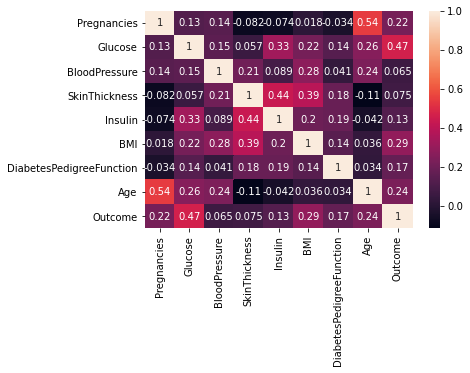

,1,2,corr
0,SkinThickness,Age,-0.75549
1,SkinThickness,Pregnancies,-0.67052
2,Insulin,Pregnancies,-0.64202
3,Age,Insulin,-0.63670
4,Age,BMI,-0.49371
5,Pregnancies,BMI,-0.47731
6,Pregnancies,DiabetesPedigreeFunction,-0.45675
7,DiabetesPedigreeFunction,Age,-0.40203
8,Outcome,BloodPressure,-0.36521
9,SkinThickness,Outcome,-0.36464


In [26]:
df.corrwith(df["Outcome"]).sort_values(ascending=False)
corr_df = df.corr()

sns.heatmap(corr_df, annot=True, xticklabels=corr_df.columns, yticklabels=corr_df.columns)
plt.show()

corr_df = corr_df.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['1', '2']
corr_df = corr_df.reset_index()
corr_df.sort_values(by="corr",ascending=True).head(30)



# Değişken Mühendisliği (Feature Engineering)


 1. Eksik ve aykırı değerler için gerekli işlemleri yapınız.
 2. Yeni değişkenler oluşturunuz.
 3. Encoding işlemlerini gerçekleştiriniz.
 4.  Numerik değişkenler için standartlaştırma yapınız.
 5. Model oluşturunuz.



### 1. Eksik ve aykırı değerler için gerekli işlemler


#### eksik değerler için

In [27]:
# Glucose, BloodPressure, SkinThickness, Insulin, BMI değerleri 0 olamaz. NaN ile değiştir!

In [28]:
fancy = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in fancy:
    df[[i]] = df[[i]].replace(0, np.NaN)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [30]:
# Eksik değerler oluştuğunu gördük. Şimdi onları ortalama ile dolduralım.

In [31]:
missing_column = missing_values_table(df,True)

               n_miss    ratio
Insulin           374 48.70000
SkinThickness     227 29.56000
BloodPressure      35  4.56000
BMI                11  1.43000
Glucose             5  0.65000


In [32]:
missing_column

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [33]:
for i in missing_column:
    df.loc[(df["Outcome"] == 0) & (df[i].isnull()), i] = df[df["Outcome"] == 0][i].mean()
    df.loc[(df["Outcome"] == 1) & (df[i].isnull()), i] = df[df["Outcome"] == 1][i].mean()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### aykırı değerler için

In [35]:
# baskılama 
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in num_cols:
    replace_with_thresholds(df, col)

In [36]:
# Aykırı değer var mı diye tekrar kontrol ettik
for col in num_cols:
    print(col, check_outlier(df,col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False



### 2. Yeni değişkenler oluşturma


In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.00000,148.00000,72.00000,35.00000,206.84615,33.60000,0.62700,50.00000,1
1,1.00000,85.00000,66.00000,29.00000,130.28788,26.60000,0.35100,31.00000,0
2,8.00000,183.00000,64.00000,33.00000,206.84615,23.30000,0.67200,32.00000,1
3,1.00000,89.00000,66.00000,23.00000,94.00000,28.10000,0.16700,21.00000,0
4,0.00000,137.00000,45.00000,35.00000,168.00000,43.10000,2.27337,33.00000,1


In [38]:
# 1) New_IdealWeight

Dünya Sağlık Örgütü tarafından belirlenmiş sınıflamaya göre;
* 18.5 altında BMI Az kilolu
* 18.5 - 24.9 Normal Kilolu
* 25.0 - 29.9 Fazla Kilolu
* 30.0 - 39.9 Obez
* 40.5 - 50 Morbid (ciddi)
* 50 ve üstü Süper obez

In [39]:
df["New_IdealWeight"] = df["BMI"].apply(lambda x: "Ideal Weight" if x <= 24.9 and x >= 18.5 else "Not Ideal")

In [40]:
# 2) New_PregCat

In [41]:
df.loc[df["Pregnancies"] == 0, "New_PregCat"] = "Not Pregnant"
df.loc[df["Pregnancies"] > 0, "New_PregCat"] = "Pregnant"

In [42]:
# 3) New_AgeCat

In [43]:
df["New_AgeCat"] = pd.cut(df["Age"], [20, 35, 50, 70], labels = ["young", "mature", "old"])

In [44]:
# 4) New_AgeBmi

In [45]:
df["New_AgeBmi"] = df["Age"]/df["BMI"]

In [46]:
# 5) New_GlucoseAge

In [47]:
df["New_GlucoseAge"] = df["Glucose"]/df["Age"]

In [48]:
# 6) New_SkinthicknessAge

In [49]:
df["New_SkinthicknessAge"] = df["SkinThickness"]/df["Age"]

In [50]:
# 7) New_GlucoseInsulin

In [51]:
df["New_GlucoseInsulin"] = df["Glucose"] * df["Insulin"]

In [52]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_IdealWeight,New_PregCat,New_AgeCat,New_AgeBmi,New_GlucoseAge,New_SkinthicknessAge,New_GlucoseInsulin
0,6.00000,148.00000,72.00000,35.00000,206.84615,33.60000,0.62700,50.00000,1,Not Ideal,Pregnant,mature,1.48810,2.96000,0.70000,30613.23077
1,1.00000,85.00000,66.00000,29.00000,130.28788,26.60000,0.35100,31.00000,0,Not Ideal,Pregnant,young,1.16541,2.74194,0.93548,11074.46970
2,8.00000,183.00000,64.00000,33.00000,206.84615,23.30000,0.67200,32.00000,1,Ideal Weight,Pregnant,young,1.37339,5.71875,1.03125,37852.84615
3,1.00000,89.00000,66.00000,23.00000,94.00000,28.10000,0.16700,21.00000,0,Not Ideal,Pregnant,young,0.74733,4.23810,1.09524,8366.00000
4,0.00000,137.00000,45.00000,35.00000,168.00000,43.10000,2.27337,33.00000,1,Not Ideal,Not Pregnant,young,0.76566,4.15152,1.06061,23016.00000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    float64 
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    float64 
 8   Outcome                   768 non-null    int64   
 9   New_IdealWeight           768 non-null    object  
 10  New_PregCat               768 non-null    object  
 11  New_AgeCat                766 non-null    category
 12  New_AgeBmi                768 non-null    float64 
 13  New_GlucoseAge            768 non-null    float64 


### 3. Encoding İşlemleri


In [54]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [55]:
binary_cols = ['New_IdealWeight','New_PregCat']

In [56]:
for col in binary_cols:
    df=label_encoder(df, col)

In [57]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [58]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [59]:
ohe_cols

['New_AgeCat']

In [60]:
df=one_hot_encoder(df, ohe_cols)

In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_IdealWeight,New_PregCat,New_AgeBmi,New_GlucoseAge,New_SkinthicknessAge,New_GlucoseInsulin,New_AgeCat_mature,New_AgeCat_old
0,6.00000,148.00000,72.00000,35.00000,206.84615,33.60000,0.62700,50.00000,1,1,1,1.48810,2.96000,0.70000,30613.23077,1,0
1,1.00000,85.00000,66.00000,29.00000,130.28788,26.60000,0.35100,31.00000,0,1,1,1.16541,2.74194,0.93548,11074.46970,0,0
2,8.00000,183.00000,64.00000,33.00000,206.84615,23.30000,0.67200,32.00000,1,0,1,1.37339,5.71875,1.03125,37852.84615,0,0
3,1.00000,89.00000,66.00000,23.00000,94.00000,28.10000,0.16700,21.00000,0,1,1,0.74733,4.23810,1.09524,8366.00000,0,0
4,0.00000,137.00000,45.00000,35.00000,168.00000,43.10000,2.27337,33.00000,1,1,0,0.76566,4.15152,1.06061,23016.00000,0,0



### 4. Numerik değişkenler için standartlaştırma 


In [62]:
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


### 5. Model 


In [63]:
# bağımlı değişken 
y = df["Outcome"]

# bağımsız değişkenler Outcome dışındaki değişkenler
X = df.drop(["Outcome"], axis=1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [65]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8701298701298701

#### Son olarak oluşturduğumuz yeni değişkenlerin etkisini gözlemleyelim

In [66]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

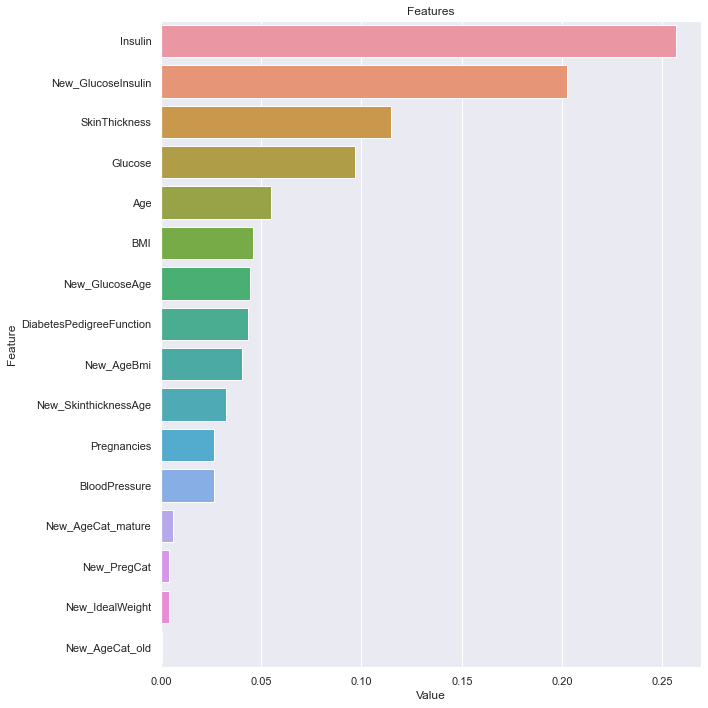

In [67]:
plot_importance(rf_model, X_train)